## Erro de Truncamento - Método de RK - Ponto Médio 

### Massa-Mola

$$\frac{dx^2}{dt^2} = -\omega_o^2x$$

Dividindo em duas equações

$$\frac{dv}{dt} = -\omega_o^2x$$
$$ \frac{dx}{dt} =  v$$

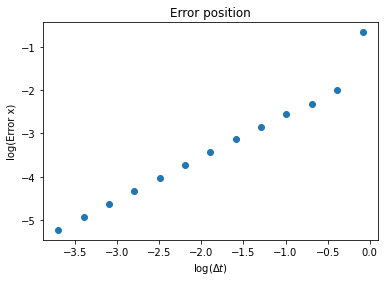

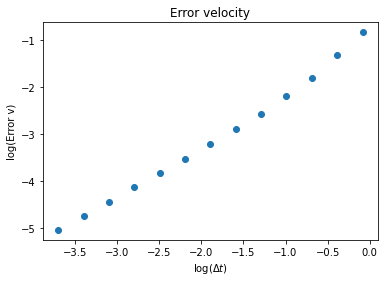

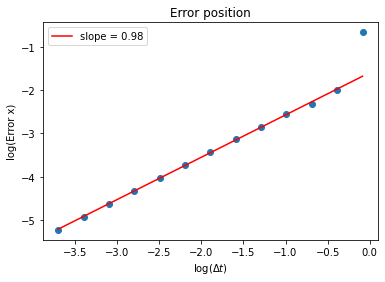

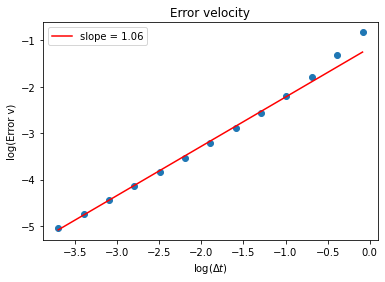

In [35]:
import numpy as np
import matplotlib.pyplot as plt


def fV(w,x):
    return (-(w**2)*x)

def fX(v):
    return v

def X_analytic(w,t):
    return np.cos(w*t)

def V_analytic(w,t):
    return -w*np.sin(w*t)

# condições iniciais
w = 1.0
x_o = 1.0
v_o = 0
tf=20

error_x_l = []
error_v_l = []
#t_l = [dt[0]]
dt = 0.0001
dtf = 0.5
dt0 = []
while dt < dtf:
    
    x = x_o
    v = v_o
    
    error_v = 0
    error_x = 0
    t = 0
    dt = 2*dt
    dt0.append(dt)
    while(t<tf):
       
        k1X = fX(v)
        k1V = fV(w,x)
        xaux = x + k1X*dt/2
        vaux = v + k1V*dt/2
        k2X = fX(vaux)
        k2V = fV(w,xaux)
    
        v = v + k2V*dt
        v_an = V_analytic(w,t)
        error_v +=  (v - v_an)
        x = x + k2X*dt 
        x_an = X_analytic(w,t)
        error_x += (x - x_an)
    
        
        t += dt
   
    mean_v = abs(error_v*(dt/tf))
    mean_x = abs(error_x*(dt/tf))
    error_v_l.append(mean_v)
    error_x_l.append(mean_x)

    
dt0 = np.log10(dt0)
error_x_l = np.log10(error_x_l)
error_v_l = np.log10(error_v_l)

plt.figure()
plt.title("Error position")
plt.plot(dt0,error_x_l, 'o')    
plt.ylabel("log(Error x)")
plt.xlabel("log($\Delta t$)")
plt.show()
plt.close()

plt.figure()
plt.title("Error velocity")
plt.plot(dt0,error_v_l, 'o')    
plt.ylabel("log(Error v)")
plt.xlabel("log($\Delta t$)")
plt.show()
plt.close()


# Ajuste linear

from scipy import stats
# posição
res = stats.linregress(dt0[0:11],error_x_l[0:11]) 

y = []
for i in dt0:
    y.append(res.slope*i + res.intercept)
    
plt.figure()
plt.title("Error position")
plt.plot(dt0,error_x_l, 'o') 
plt.plot(dt0, y, 'r', label="slope = {0:.2f}".format(res.slope))
plt.legend()
plt.ylabel("log(Error x)")
plt.xlabel("log($\Delta t$)")
plt.show()
plt.close()
# velocidade
res = stats.linregress(dt0[0:11],error_v_l[0:11]) 

y = []
for i in dt0:
    y.append(res.slope*i + res.intercept)
    
plt.figure()
plt.title("Error velocity")
plt.plot(dt0,error_v_l, 'o') 
plt.plot(dt0, y, 'r', label="slope = {0:.2f}".format(res.slope))
plt.legend()
plt.ylabel("log(Error v)")
plt.xlabel("log($\Delta t$)")
plt.show()
plt.close()    

